In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### **get dateset from google drive**

In [0]:
#list(drive.ListFile())
file_id = '1wj5EXCBZ9wyzxYoyHk3XHuvV2ZZSTGAb' #Maryam
#file_id = '1QHq13EfkJHYWhve0-zh_IAQ1U5GDCIoX' #Tahere
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('fer2013.csv') 

### **import requirements**

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import keras
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
from keras.utils import to_categorical
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D
from keras import backend as K
import keras
from __future__ import print_function
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras import optimizers
from sklearn.metrics import confusion_matrix
import itertools
from google.colab import files
import h5py
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


### **load the dateset into a dataframe**

In [4]:
df = pd.DataFrame.from_csv('fer2013.csv', index_col=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


### split dataset

In [5]:
train = df[0:28709]
cv = df[28709:32298]
test = df[32298:]
y_train = train.emotion
y_cv = cv.emotion

num_pix = 2304 #48*48
num_classes = 7
train_size = train.shape[0]
cv_size = cv.shape[0]
cv_size

3589

### **split pixels and convert data to 3d (3 channels)**

In [0]:
X_train = np.zeros((train_size, 48,48))
for i in range (train_size):
    b = [int(j) for j in train.pixels[i].split()]
    X_train[i] = np.array(b).reshape([48,48])

In [0]:
X_cv = np.zeros((cv_size, 48,48))
for i in range (train_size, train_size + cv_size):
    b = [int(j) for j in cv.pixels[i].split()]
    X_cv[i-train_size] = np.array(b).reshape([48,48])

In [0]:
img_rows, img_cols = 48, 48

In [0]:
if K.image_data_format() == 'channels_first':
  X_train = X_train.reshape(train_size, 1, img_rows, img_cols)
  X_cv = X_cv.reshape(cv_size, 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  X_train = X_train.reshape(train_size, img_rows, img_cols, 1)
  X_cv = X_cv.reshape(cv_size, img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

In [10]:
X_train = X_train.astype('float64')
X_cv = X_cv.astype('float64')
X_train /= 255
X_cv /= 255
print('x_train shape:', X_train.shape)
print(train_size, 'train samples')
print(cv_size, 'cv samples')

x_train shape: (28709, 48, 48, 1)
28709 train samples
3589 cv samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_cv = keras.utils.to_categorical(y_cv, num_classes)

### **Use a sequential model to train:**

In [0]:
model = Sequential()
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same',
                        name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
conv1 = Activation('relu')
model.add(conv1)
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
conv2 = Activation('relu')
model.add(conv2)
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
conv3 = Activation('relu')
model.add(conv3)
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
conv4 = Activation('relu')
model.add(conv4)
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
conv5 = Activation('relu')
model.add(conv5)
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

# model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))
# model.add(BatchNormalization())
# model.add(Convolution2D(filters=num_classes, kernel_size=(3, 3), padding='same'))
# model.add(GlobalAveragePooling2D())
# model.add(Activation('softmax',name='predictions'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

see the summary of model below:

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (Conv2D)         (None, 48, 48, 16)        800       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 16)        12560     
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 16)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 16)        0         
__________

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
import os, glob, time
epoch_num = 0
outputFolder = './output-SEQ7_51_d'
file_ini = outputFolder+'/weights-'+ str(epoch_num)+'*'
filename =  glob.glob(file_ini)

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


In [0]:
outputFolder = './output-SEQ7_51_d/'
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)
filepath=outputFolder+"/weights-{epoch:02d}-{val_acc:.2f}.h5"

### **define some callbacks like model checkpoint and early stopping**

In [0]:
# earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=5, \
#                           verbose=1, mode='auto')
# callbacks_list = [earlystop]

In [0]:
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, \
                             save_best_only=False, save_weights_only=False,\
                             mode='auto', period=10)
callbacks_list = [checkpoint]

### **train the model**

In [20]:
model_info = model.fit(X_train, y_train, 
         batch_size=128,
         epochs= 200,
         callbacks=callbacks_list,              
         verbose=1,
         validation_data=(X_cv, y_cv))

# model_info = model.fit(X_train, y_train, batch_size=128, \
#                        epochs=100, callbacks=callbacks_list, verbose=1, \
#                         initial_epoch = epoch_num+1)

Train on 28709 samples, validate on 3589 samples
Epoch 1/200
28709/28709 [==============================] - 19s 676us/step - loss: 1.8373 - acc: 0.2492 - val_loss: 1.8631 - val_acc: 0.2053
Epoch 2/200
28709/28709 [==============================] - 16s 560us/step - loss: 1.7077 - acc: 0.3136 - val_loss: 1.7657 - val_acc: 0.3129
Epoch 3/200
28709/28709 [==============================] - 16s 561us/step - loss: 1.6127 - acc: 0.3651 - val_loss: 1.6961 - val_acc: 0.3396
Epoch 4/200
28709/28709 [==============================] - 16s 560us/step - loss: 1.5517 - acc: 0.3948 - val_loss: 1.6181 - val_acc: 0.3722
Epoch 5/200
28709/28709 [==============================] - 16s 562us/step - loss: 1.5120 - acc: 0.4160 - val_loss: 1.4099 - val_acc: 0.4466
Epoch 6/200
28709/28709 [==============================] - 16s 560us/step - loss: 1.4791 - acc: 0.4302 - val_loss: 1.4303 - val_acc: 0.4469
Epoch 7/200
28709/28709 [==============================] - 16s 558us/step - loss: 1.4413 - acc: 0.4447 - val_lo

## ***the accuracy is 62%***

In [21]:
!ls

adc.json  fer2013.csv  output-SEQ7_51_d  sample_data


In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

### **plot accuracy per epoch**

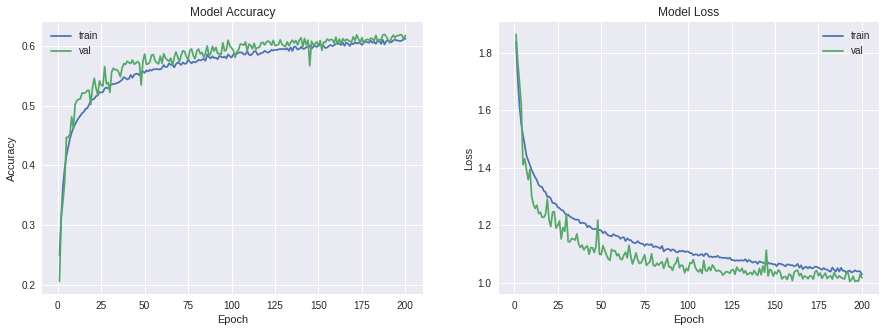

In [23]:
plot_model_history(model_info)

In [0]:
y_pred = model.predict(X_train)

In [0]:
# 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'sad', 'Surprise', 'Neutral']

### **plot the confusion matrix of the train data**

Confusion matrix, without normalization
[[2507   19  129  172  459   70  639]
 [ 131  211   11    9   46   11   17]
 [ 502   17 1415  167 1027  479  490]
 [  92    0   41 6520  165   98  299]
 [ 387   11  199  138 3001   38 1056]
 [  63    2  127  163   52 2649  115]
 [ 266    1   75  314  576   55 3678]]
Normalized confusion matrix
[[6.28e-01 4.76e-03 3.23e-02 4.31e-02 1.15e-01 1.75e-02 1.60e-01]
 [3.00e-01 4.84e-01 2.52e-02 2.06e-02 1.06e-01 2.52e-02 3.90e-02]
 [1.23e-01 4.15e-03 3.45e-01 4.08e-02 2.51e-01 1.17e-01 1.20e-01]
 [1.28e-02 0.00e+00 5.68e-03 9.04e-01 2.29e-02 1.36e-02 4.14e-02]
 [8.01e-02 2.28e-03 4.12e-02 2.86e-02 6.21e-01 7.87e-03 2.19e-01]
 [1.99e-02 6.31e-04 4.01e-02 5.14e-02 1.64e-02 8.35e-01 3.63e-02]
 [5.36e-02 2.01e-04 1.51e-02 6.32e-02 1.16e-01 1.11e-02 7.41e-01]]


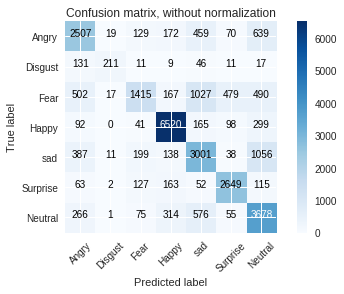

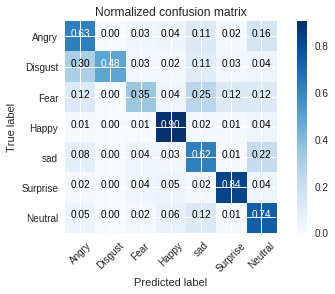

In [26]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
y_pred = model.predict(X_cv)

### **plot the confusion matrix of the test data**

Confusion matrix, without normalization
[[253   3  24  28  69  17  73]
 [ 18  21   2   3   5   2   5]
 [ 65   1 119  25 146  62  78]
 [ 21   1  12 750  21  23  67]
 [ 66   0  31  45 348  11 152]
 [  7   0  16  22  15 339  16]
 [ 42   1  20  51  97  10 386]]
Normalized confusion matrix
[[0.54 0.01 0.05 0.06 0.15 0.04 0.16]
 [0.32 0.38 0.04 0.05 0.09 0.04 0.09]
 [0.13 0.   0.24 0.05 0.29 0.12 0.16]
 [0.02 0.   0.01 0.84 0.02 0.03 0.07]
 [0.1  0.   0.05 0.07 0.53 0.02 0.23]
 [0.02 0.   0.04 0.05 0.04 0.82 0.04]
 [0.07 0.   0.03 0.08 0.16 0.02 0.64]]


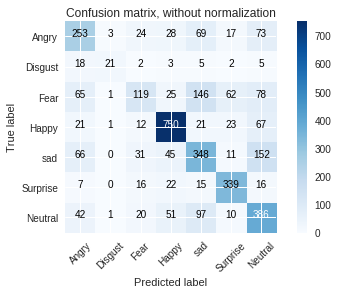

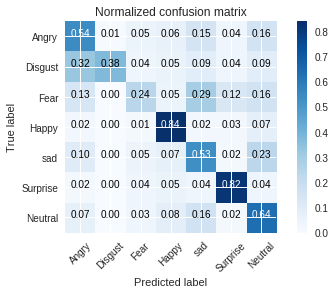

In [28]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_cv.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()